# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 
from datetime import datetime
from datetime import date
import re

%matplotlib inline

#Set path dependencies
data_path = "C:/Users/vichu/Downloads/90106/Ceilometer"

# Import CL51 data

In [2]:
'''
1.1 Import CL51 data
'''
cl51_data_path = "//Ceilometer"

cl51_data_fn_merriwa = ['L3_DEFAULT_0_20210212_Merriwa','L3_DEFAULT_0_20210213_Merriwa',
                        'L3_DEFAULT_0_20210214_Merriwa', 'L3_DEFAULT_0_20210215_Merriwa',
                       'L3_DEFAULT_0_20210216_Merriwa','L3_DEFAULT_0_20210217_Merriwa', 
                       'L3_DEFAULT_0_20210218_Merriwa']

#Use RE
cl51_data_fn_lidcombe = [re.sub('Merriwa', 'Lidcombe',data) for data in cl51_data_fn_merriwa]

cl51_full_file_path_lidcombe = [data_path+cl51_data_path+'//'+path+'.csv' for path in cl51_data_fn_lidcombe]

#Initialise a Dataframe with first table
cl51_df_lidcombe = pd.read_csv(cl51_full_file_path_lidcombe[0])

#Loop through the rest of the data and append. Note both data is same length
for i in range(1,len(cl51_full_file_path_lidcombe)):
    cl51_df_lidcombe = cl51_df_lidcombe.append(pd.read_csv(cl51_full_file_path_lidcombe[i]), ignore_index = True)
    
#Set -999 values to np.nan
cl51_df_lidcombe = cl51_df_lidcombe.replace(-999, np.nan)

In [3]:
#Further breakdown the time stamp
#First convert to datetime object
cl51_df_lidcombe['datetime'] = pd.to_datetime(cl51_df_lidcombe['# Time'], format='%d/%m/%Y %H:%M:%S')


In [4]:
'''
Imputation

Strategy: Use df.interpolate method = time
'''
#Reset index
cl51_df_lidcombe = cl51_df_lidcombe.set_index('datetime')

#Define a new column
cl51_df_lidcombe = cl51_df_lidcombe.assign(revised_bl_height=cl51_df_lidcombe.bl_height.interpolate(method='time'))


In [5]:
cl51_df_lidcombe

,# Time,Layer_QualityIndex,bl_height,Mean_Layer_Height,n_BL,cloud_stat,cloud_dat,revised_bl_height
datetime,,,,,,,,
2021-02-12 11:00:00,12/02/2021 11:00:00,3.0,440.0,390.0,3,1,4880.0,440.0
2021-02-12 11:00:16,12/02/2021 11:00:16,3.0,440.0,390.0,3,1,4850.0,440.0
2021-02-12 11:00:32,12/02/2021 11:00:32,3.0,440.0,390.0,3,1,4850.0,440.0
2021-02-12 11:00:48,12/02/2021 11:00:48,3.0,440.0,390.0,3,1,4600.0,440.0
2021-02-12 11:01:04,12/02/2021 11:01:04,3.0,440.0,390.0,3,1,4600.0,440.0
...,...,...,...,...,...,...,...,...
2021-02-19 10:58:40,19/02/2021 10:58:40,1.0,890.0,930.0,3,1,750.0,890.0
2021-02-19 10:58:56,19/02/2021 10:58:56,1.0,890.0,930.0,3,1,750.0,890.0
2021-02-19 10:59:12,19/02/2021 10:59:12,1.0,890.0,930.0,3,1,760.0,890.0


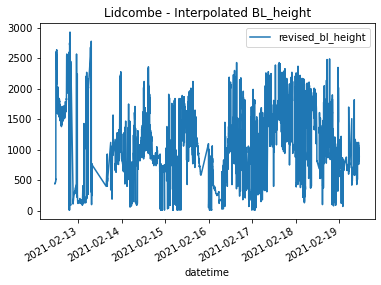

In [6]:
cl51_df_lidcombe.plot(y = ['revised_bl_height'])
plt.title('Lidcombe - Interpolated BL_height')
plt.show()


# Import CTM data

In [7]:
'''
2. Import CTM data
'''
data_path2 = "C:/Users/vichu/Downloads/90106/CTM New"

ctm_data_path = "//CTM OUTPUT"

ctm_data_fn_merriwa = ['ctm_gmr_20210212_Merriwa','ctm_gmr_20210213_Merriwa',
                       'ctm_gmr_20210214_Merriwa','ctm_gmr_20210215_Merriwa',
                       'ctm_gmr_20210216_Merriwa','ctm_gmr_20210217_Merriwa',
                       'ctm_gmr_20210218_Merriwa']

#Use RE
ctm_data_fn_lidcombe = [re.sub('Merriwa', 'Lidcombe',data) for data in ctm_data_fn_merriwa]

ctm_full_file_path_lidcombe = [data_path2+ctm_data_path+'//'+path+'.csv' for path in ctm_data_fn_lidcombe]

#Initialise a Dataframe with first table
ctm_df_lidcombe = pd.read_csv(ctm_full_file_path_lidcombe[0])

#Loop through the rest of the data and append. Note both data is same length
for i in range(1,len(ctm_full_file_path_lidcombe)):
    ctm_df_lidcombe = ctm_df_lidcombe.append(pd.read_csv(ctm_full_file_path_lidcombe[i]), ignore_index = True)

In [8]:
'''
Change time to AEST and set datetime
'''

def convert_df_to_datetime(df):
    df['time_AEST'] = (df[' time'] + 10) % 24

    #Loop through and convert date to proper date
    length_data = len(df)

    #Defined new columns
    df['date_proper'] = 0
    df['datetime'] = ''

    #Sets the date based on change of time and creates a datetime stamp
    #Very clunky but it works
    for i in range(length_data):
        date_1 = str(df.loc[i,' date'])

        year_date_1 = date_1[:4]
        month_date_1 = date_1[4:6]
        day_date_1 = int(date_1[6::])

        if i > 1:
            #This means the day has changed
            if (df.loc[i,'time_AEST'] < df.loc[i-1,'time_AEST']):
                day_date_1 += 1

        df.loc[i, 'date_proper'] = date(int(year_date_1), int(month_date_1), day_date_1)

        #Days are monotonic
        if i > 1:
            if (df.loc[i,'date_proper'] < df.loc[i-1,'date_proper']):
                df.loc[i,'date_proper'] = df.loc[i-1,'date_proper']

        date_proper_1 = str(df.loc[i,'date_proper'])
        time_1 = str(df.loc[i, 'time_AEST'])

        datetime_str = date_proper_1 + " " + time_1
        df.loc[i, 'datetime'] = datetime.strptime(datetime_str, '%Y-%m-%d %H')

    #Set index to datetime
    df = df.set_index('datetime')
    
    return df

In [9]:
#Apply functions
ctm_df_lidcombe = convert_df_to_datetime(ctm_df_lidcombe)

In [10]:
ctm_df_lidcombe

,lat,lon,date,time,temperature,mixing_height,time_AEST,date_proper
datetime,,,,,,,,
2021-02-12 10:00:00,-33.9,151.06,20210212,0,31.63,898.0856,10,2021-02-12
2021-02-12 11:00:00,-33.9,151.06,20210212,1,33.49,1035.7593,11,2021-02-12
2021-02-12 12:00:00,-33.9,151.06,20210212,2,34.07,984.8432,12,2021-02-12
2021-02-12 13:00:00,-33.9,151.06,20210212,3,33.34,546.3094,13,2021-02-12
2021-02-12 14:00:00,-33.9,151.06,20210212,4,31.39,559.0942,14,2021-02-12
...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,-33.9,151.06,20210218,19,22.63,152.9865,5,2021-02-19
2021-02-19 06:00:00,-33.9,151.06,20210218,20,22.91,335.2351,6,2021-02-19
2021-02-19 07:00:00,-33.9,151.06,20210218,21,23.15,417.5187,7,2021-02-19


In [11]:
'''
Function: convert CL51 data to grouped data
'''
def cl51_data_grouped(df):
    #Unset datetime index
    cl51_df_v2 = df.reset_index()
    
    #Create unique datetime key with hourly granularity
    cl51_df_v2['key'] = cl51_df_v2['datetime'].dt.year.astype(str)+cl51_df_v2['datetime'].dt.month.astype(str)+cl51_df_v2['datetime'].dt.day.astype(str)+cl51_df_v2['datetime'].dt.hour.astype(str)

    #Group PBLH on key 
    cl51_grouped_df = pd.DataFrame(cl51_df_v2.groupby(cl51_df_v2["key"])["revised_bl_height"].mean())
    
    cl51_grouped_df = cl51_grouped_df.reset_index()
    
    return cl51_grouped_df

In [12]:
cl51_grouped_df_lidcombe = cl51_data_grouped(cl51_df_lidcombe)

In [13]:
cl51_grouped_df_lidcombe

,key,revised_bl_height
0,202121211,1474.222222
1,202121212,1826.222222
2,202121213,1662.444444
3,202121214,1500.755556
4,202121215,1546.844444
...,...,...
163,20212195,845.268328
164,20212196,1094.350000
165,20212197,616.111111
166,20212198,879.903145


In [14]:
'''
Function: Combines CL51 and CTM data to one consolidated output
'''
def combined_data(cl51_grouped_df, ctm_df):
    #Use CTM data as base - as this has smaller number of rows
    df = pd.DataFrame(ctm_df.loc[:,' mixing_height'])

    #unset datetime index
    df = df.reset_index()

    #Create key similar to CL51 groupped data
    df['key'] = df['datetime'].dt.year.astype(str)+df['datetime'].dt.month.astype(str)+df['datetime'].dt.day.astype(str)+df['datetime'].dt.hour.astype(str)

    #Merge
    df_2 = pd.merge(df, cl51_grouped_df, how = 'inner', on = 'key').set_index('datetime')
    
    #Drop unnecessary stuff
    df_2 = df_2.drop(columns = 'key')
    
    #rename columns
    df_2 = df_2.rename(columns = {' mixing_height':'Predicted PBLH', 'revised_bl_height':'Actual PBLH'})
    
    return df_2 

In [15]:
comp_df_lidcombe = combined_data(cl51_grouped_df_lidcombe, ctm_df_lidcombe)

In [16]:
#sanity check
comp_df_lidcombe

,Predicted PBLH,Actual PBLH
datetime,,
2021-02-12 11:00:00,1035.7593,1474.222222
2021-02-12 12:00:00,984.8432,1826.222222
2021-02-12 13:00:00,546.3094,1662.444444
2021-02-12 14:00:00,559.0942,1500.755556
2021-02-12 15:00:00,330.0530,1546.844444
...,...,...
2021-02-19 05:00:00,152.9865,845.268328
2021-02-19 06:00:00,335.2351,1094.350000
2021-02-19 07:00:00,417.5187,616.111111


In [17]:
comp_df_lidcombe1 = comp_df_lidcombe
del comp_df_lidcombe1['Predicted PBLH']

In [18]:
comp_df_lidcombe1

,Actual PBLH
datetime,
2021-02-12 11:00:00,1474.222222
2021-02-12 12:00:00,1826.222222
2021-02-12 13:00:00,1662.444444
2021-02-12 14:00:00,1500.755556
2021-02-12 15:00:00,1546.844444
...,...
2021-02-19 05:00:00,845.268328
2021-02-19 06:00:00,1094.350000
2021-02-19 07:00:00,616.111111


# Import historical observations

In [19]:
historical_obs_lidcombe = pd.read_csv('C:/Users/vichu/Downloads/90106/Historical Observations - Lidcombe.csv', encoding = 'latin1')

In [20]:
def convert_df_to_datetime(df):
    df['time_AEST'] = (df['time'])

    #Loop through and convert date to proper date
    length_data = len(df)

    #Defined new columns
    df['date_proper'] = 0
    df['datetime'] = ''

    #Sets the date based on change of time and creates a datetime stamp
    #Very clunky but it works
    for i in range(length_data):
        date_1 = str(df.loc[i,'date'])

        year_date_1 = date_1[:4]
        month_date_1 = date_1[4:6]
        day_date_1 = int(date_1[6::])

        #if i > 1:
            #This means the day has changed
     #       if (df.loc[i,'time_AEST'] < df.loc[i-1,'time_AEST']):
      #          day_date_1 += 1

        df.loc[i, 'date_proper'] = date(int(year_date_1), int(month_date_1), day_date_1)

        #Days are monotonic
        if i > 1:
            if (df.loc[i,'date_proper'] < df.loc[i-1,'date_proper']):
                df.loc[i,'date_proper'] = df.loc[i-1,'date_proper']

        date_proper_1 = str(df.loc[i,'date_proper'])
        time_1 = str(df.loc[i, 'time_AEST'])

        datetime_str = date_proper_1 + " " + time_1
        df.loc[i, 'datetime'] = datetime.strptime(datetime_str, '%Y-%m-%d %H')

    #Set index to datetime
    df = df.set_index('datetime')
    
    return df

In [21]:
ext_df_lidcombe = convert_df_to_datetime(historical_obs_lidcombe)

In [22]:
ext_df_lidcombe

,date,time,AQI (based on 24 h rolling PM),AQI,CO (ppm),Humidity (ppm),Nephelometer (10^-4 m^-1),Nephelometer (index),NO (pphm),NO2 (index),...,PM2.5 (µg/m³),PM2.5 (index),PM10 (µg/m³),PM10 (index),Rainfall (mm),Temperature (degree C),Wind direction (degree),Wind speed (m/s),time_AEST,date_proper
datetime,,,,,,,,,,,,,,,,,,,,,
2021-02-12 11:00:00,20210212,11,34.600,34.6000,0.149364,38.903,0.098,4.761905,0.056400,3.583333,...,0.367,0.596774,19.175,23.9750,0.0,29.653,331.739,2.549,11,2021-02-12
2021-02-12 12:00:00,20210212,12,34.180,33.0000,0.146080,41.071,0.098,4.761905,0.032354,4.000000,...,0.158,0.258065,21.087,26.3625,0.0,29.344,341.122,2.536,12,2021-02-12
2021-02-12 13:00:00,20210212,13,40.125,40.1250,0.146025,37.793,0.105,5.238095,0.035266,2.750000,...,5.190,8.370968,22.598,28.2500,0.0,31.621,351.062,3.029,13,2021-02-12
2021-02-12 14:00:00,20210212,14,43.000,43.0000,0.153295,33.679,0.104,4.761905,0.036560,2.916667,...,7.388,11.919355,21.240,26.5500,0.0,33.368,345.062,3.395,14,2021-02-12
2021-02-12 15:00:00,20210212,15,43.375,43.3750,0.154233,33.654,0.100,4.761905,0.016396,3.333333,...,2.361,3.806452,22.086,27.6125,0.0,33.113,346.135,2.763,15,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,20210219,5,44.160,30.6125,0.108488,95.137,0.358,17.142858,0.084657,6.250000,...,4.106,6.629032,24.486,30.6125,2.4,20.604,85.998,1.010,5,2021-02-19
2021-02-19 06:00:00,20210219,6,43.880,36.0625,0.125778,99.544,0.354,16.666667,0.347748,8.000000,...,4.764,7.677419,28.849,36.0625,0.0,20.732,75.933,1.132,6,2021-02-19
2021-02-19 07:00:00,20210219,7,44.560,31.3000,0.100724,85.626,0.390,18.571429,0.208687,4.416667,...,5.870,9.467742,25.040,31.3000,0.0,22.176,69.681,2.175,7,2021-02-19


In [23]:
merged_lidcombe = pd.merge(comp_df_lidcombe1, ext_df_lidcombe, how = 'inner', on = 'datetime')

In [24]:
merged_lidcombe

,Actual PBLH,date,time,AQI (based on 24 h rolling PM),AQI,CO (ppm),Humidity (ppm),Nephelometer (10^-4 m^-1),Nephelometer (index),NO (pphm),...,PM2.5 (µg/m³),PM2.5 (index),PM10 (µg/m³),PM10 (index),Rainfall (mm),Temperature (degree C),Wind direction (degree),Wind speed (m/s),time_AEST,date_proper
datetime,,,,,,,,,,,,,,,,,,,,,
2021-02-12 11:00:00,1474.222222,20210212,11,34.600,34.6000,0.149364,38.903,0.098,4.761905,0.056400,...,0.367,0.596774,19.175,23.9750,0.0,29.653,331.739,2.549,11,2021-02-12
2021-02-12 12:00:00,1826.222222,20210212,12,34.180,33.0000,0.146080,41.071,0.098,4.761905,0.032354,...,0.158,0.258065,21.087,26.3625,0.0,29.344,341.122,2.536,12,2021-02-12
2021-02-12 13:00:00,1662.444444,20210212,13,40.125,40.1250,0.146025,37.793,0.105,5.238095,0.035266,...,5.190,8.370968,22.598,28.2500,0.0,31.621,351.062,3.029,13,2021-02-12
2021-02-12 14:00:00,1500.755556,20210212,14,43.000,43.0000,0.153295,33.679,0.104,4.761905,0.036560,...,7.388,11.919355,21.240,26.5500,0.0,33.368,345.062,3.395,14,2021-02-12
2021-02-12 15:00:00,1546.844444,20210212,15,43.375,43.3750,0.154233,33.654,0.100,4.761905,0.016396,...,2.361,3.806452,22.086,27.6125,0.0,33.113,346.135,2.763,15,2021-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-19 05:00:00,845.268328,20210219,5,44.160,30.6125,0.108488,95.137,0.358,17.142858,0.084657,...,4.106,6.629032,24.486,30.6125,2.4,20.604,85.998,1.010,5,2021-02-19
2021-02-19 06:00:00,1094.350000,20210219,6,43.880,36.0625,0.125778,99.544,0.354,16.666667,0.347748,...,4.764,7.677419,28.849,36.0625,0.0,20.732,75.933,1.132,6,2021-02-19
2021-02-19 07:00:00,616.111111,20210219,7,44.560,31.3000,0.100724,85.626,0.390,18.571429,0.208687,...,5.870,9.467742,25.040,31.3000,0.0,22.176,69.681,2.175,7,2021-02-19


# Plots comparing the predicted BL height with external factors (weather)
 

Text(0.5, 1.0, 'Wind Direction Sigma Theta')

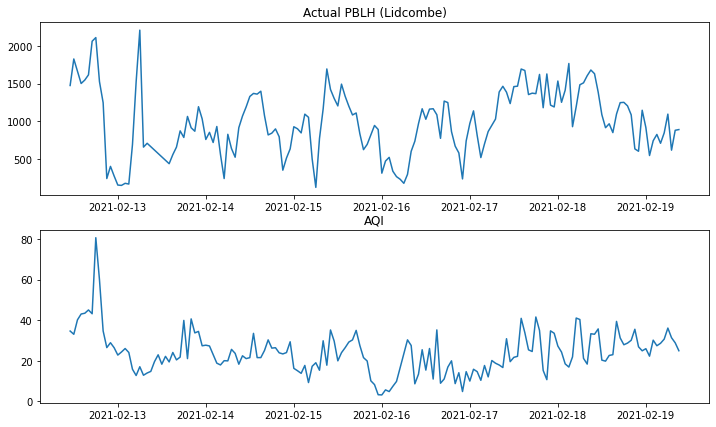

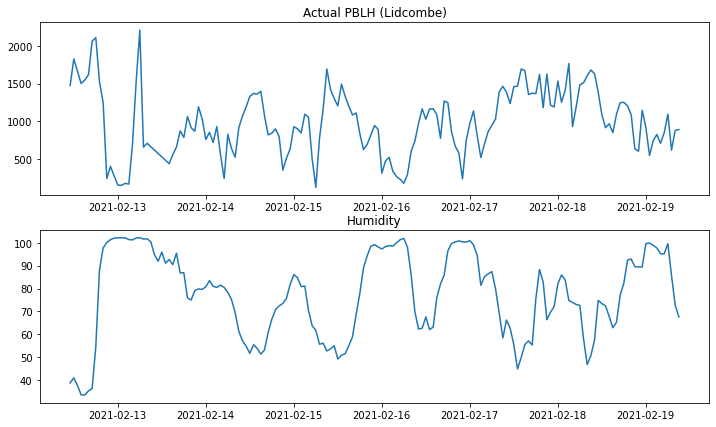

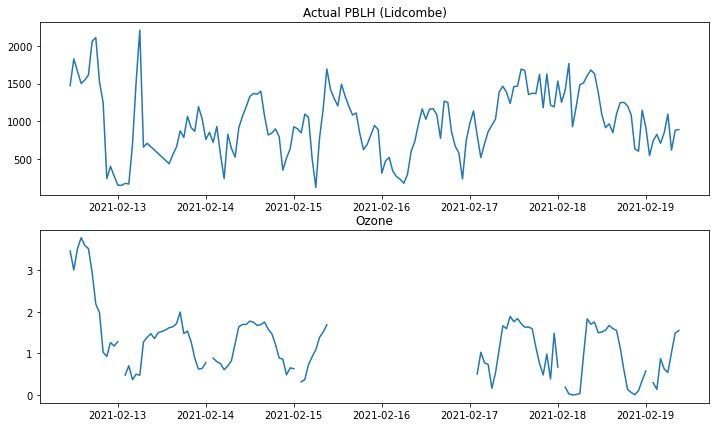

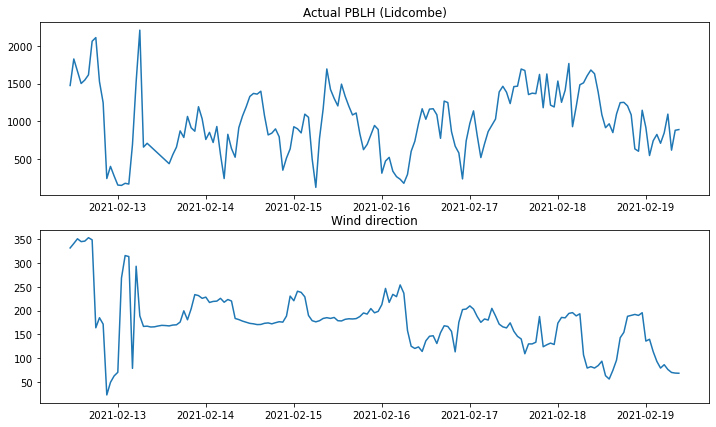

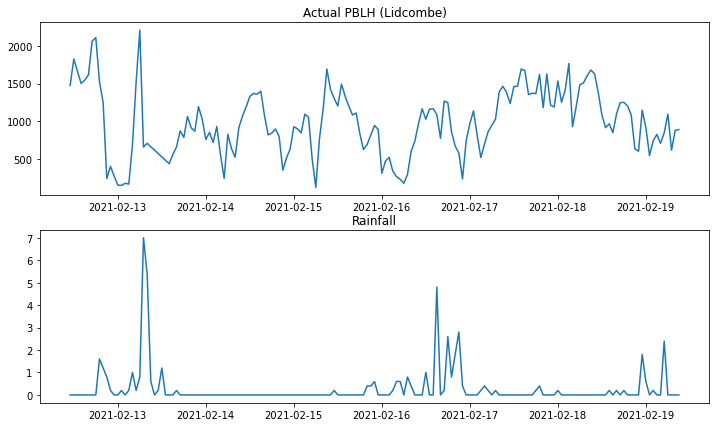

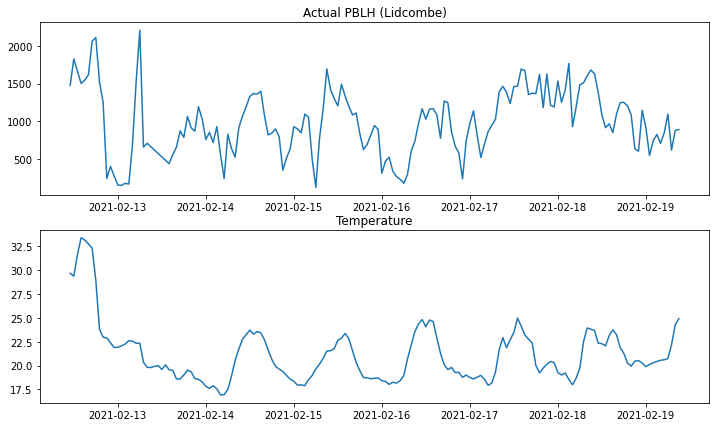

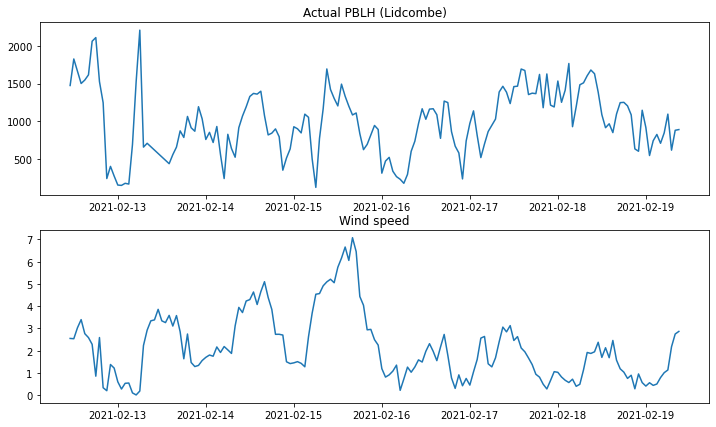

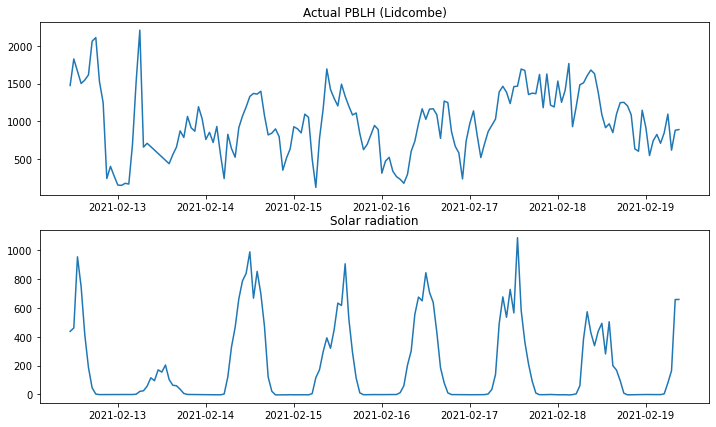

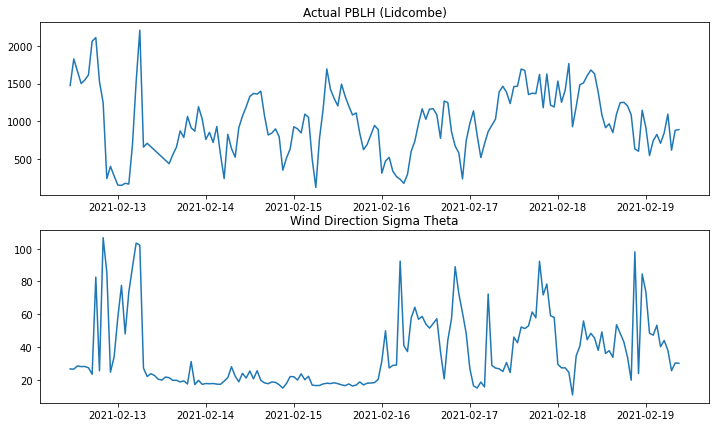

In [25]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['AQI'])
ax[1].set_title('AQI')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Humidity (ppm)'])
ax[1].set_title('Humidity')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Ozone (pphm)'])
ax[1].set_title('Ozone')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Wind direction (degree)'])
ax[1].set_title('Wind direction')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Rainfall (mm)'])
ax[1].set_title('Rainfall')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Temperature (degree C)'])
ax[1].set_title('Temperature')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Wind speed (m/s)'])
ax[1].set_title('Wind speed')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Solar radiation (W/m^2)'])
ax[1].set_title('Solar radiation')

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['SD1 (degree)'])
ax[1].set_title('Wind Direction Sigma Theta')

# Plots comparing the predicted BL height with external factors (chemicals)


Text(0.5, 1.0, 'PM10')

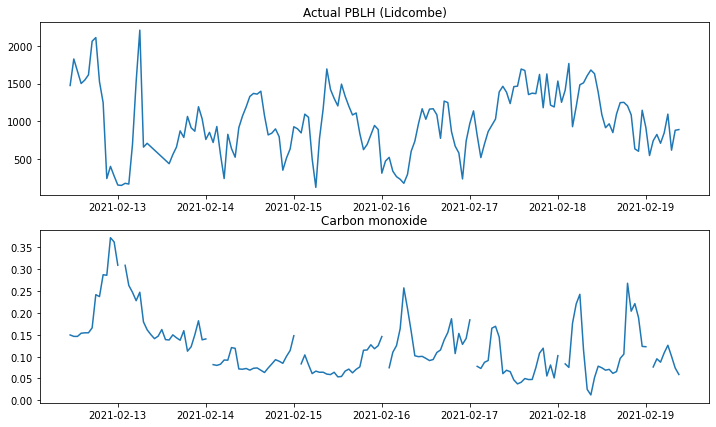

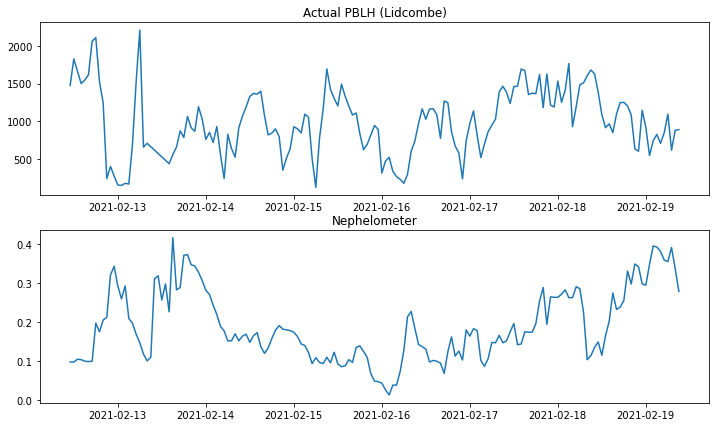

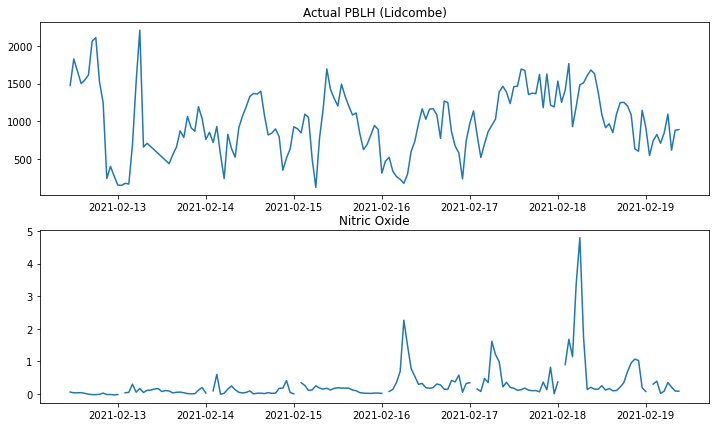

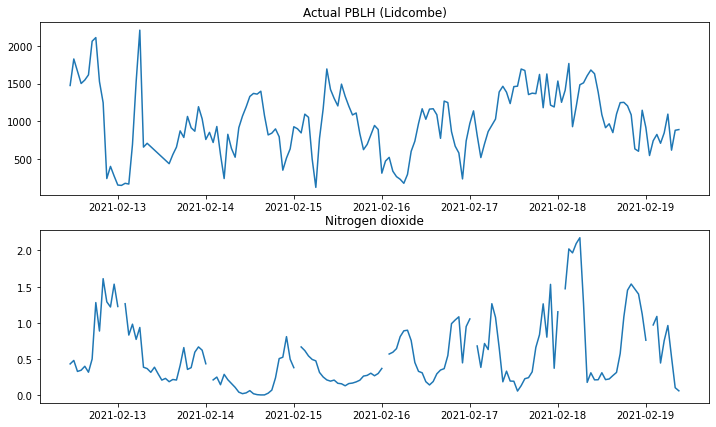

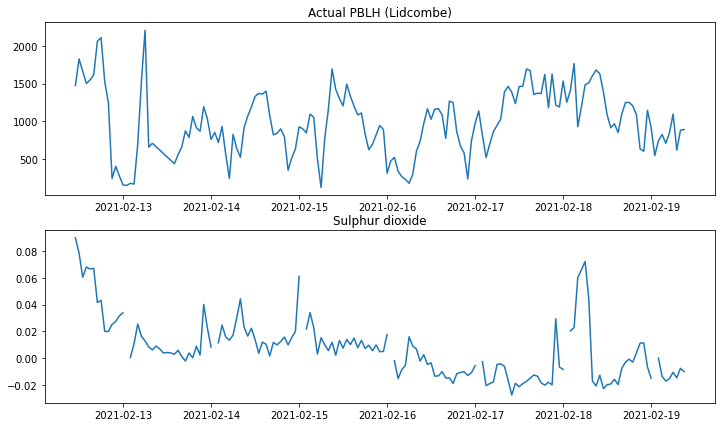

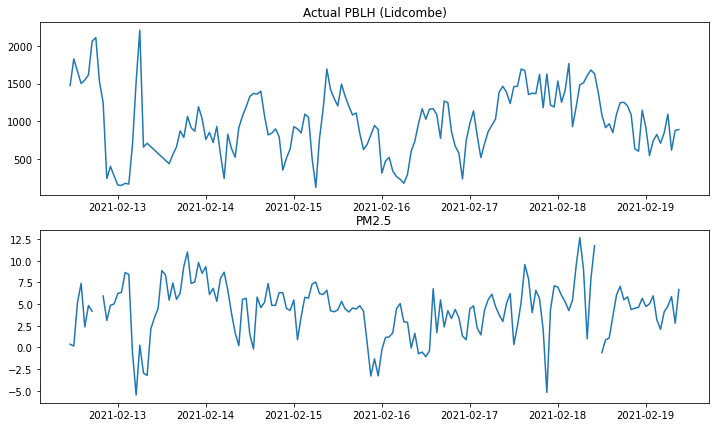

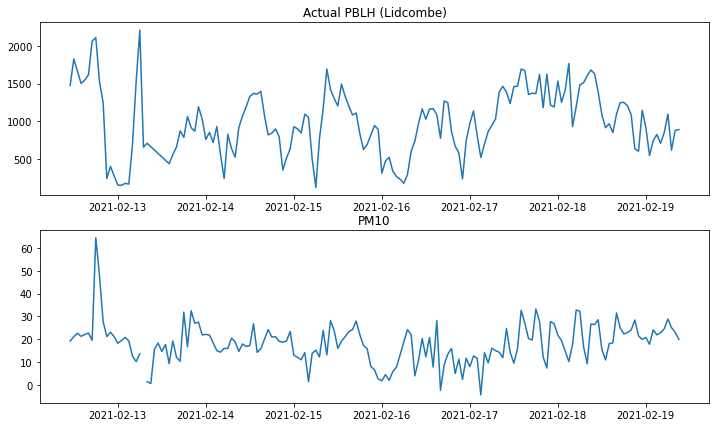

In [26]:
# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['CO (ppm)'])
ax[1].set_title('Carbon monoxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

# Add x-axis and y-axis
ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['Nephelometer (10^-4 m^-1)'])
ax[1].set_title('Nephelometer')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['NO (pphm)'])
ax[1].set_title('Nitric Oxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['NO2 (pphm)'])
ax[1].set_title('Nitrogen dioxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['SO2 (pphm)'])
ax[1].set_title('Sulphur dioxide')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['PM2.5 (µg/m³)'])
ax[1].set_title('PM2.5')

# Create figure and plot space
fig, ax = plt.subplots(2, 1, figsize=(12, 7))

ax[0].plot(merged_lidcombe['Actual PBLH'])
ax[0].set_title('Actual PBLH (Lidcombe)')


ax[1].plot(merged_lidcombe['PM10 (µg/m³)'])
ax[1].set_title('PM10')

Text(0.5, 1.0, 'Actual PBLH vs Wind Speed')

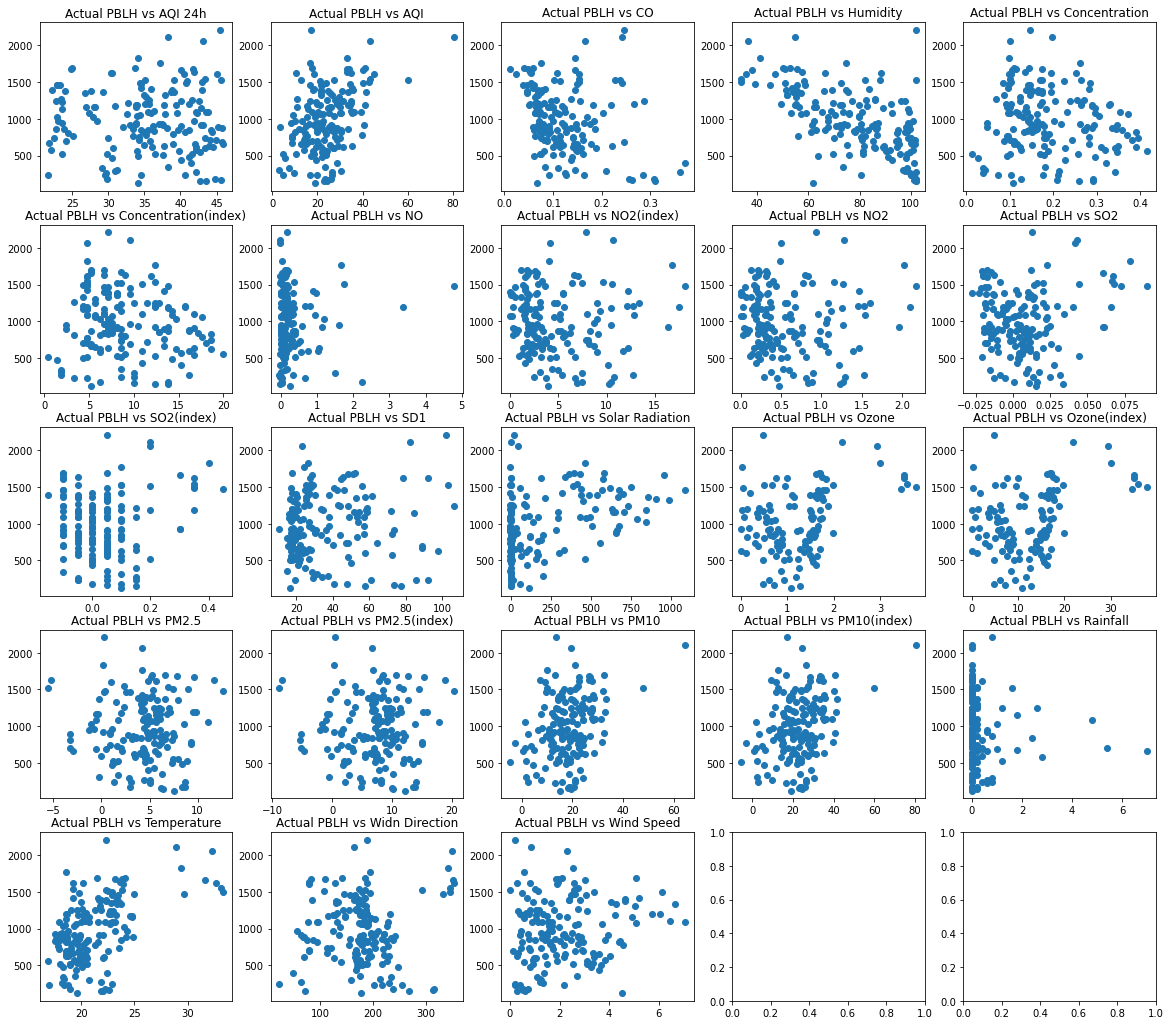

In [27]:
fig, ax= plt.subplots(5, 5, figsize=(20, 18))

ax[0, 0].scatter(merged_lidcombe['AQI (based on 24 h rolling PM)'], merged_lidcombe['Actual PBLH'])
ax[0, 0].set_title('Actual PBLH vs AQI 24h')

ax[0, 1].scatter(merged_lidcombe['AQI'], merged_lidcombe['Actual PBLH'])
ax[0, 1].set_title('Actual PBLH vs AQI')

ax[0, 2].scatter(merged_lidcombe['CO (ppm)'], merged_lidcombe['Actual PBLH'])
ax[0, 2].set_title('Actual PBLH vs CO')

ax[0, 3].scatter(merged_lidcombe['Humidity (ppm)'], merged_lidcombe['Actual PBLH'])
ax[0, 3].set_title('Actual PBLH vs Humidity')

ax[0, 4].scatter(merged_lidcombe['Nephelometer (10^-4 m^-1)'], merged_lidcombe['Actual PBLH'])
ax[0, 4].set_title('Actual PBLH vs Concentration')

ax[1, 0].scatter(merged_lidcombe['Nephelometer (index)'], merged_lidcombe['Actual PBLH'])
ax[1, 0].set_title('Actual PBLH vs Concentration(index)')

ax[1, 1].scatter(merged_lidcombe['NO (pphm)'], merged_lidcombe['Actual PBLH'])
ax[1, 1].set_title('Actual PBLH vs NO')

ax[1, 2].scatter(merged_lidcombe['NO2 (index)'], merged_lidcombe['Actual PBLH'])
ax[1, 2].set_title('Actual PBLH vs NO2(index)')

ax[1, 3].scatter(merged_lidcombe['NO2 (pphm)'], merged_lidcombe['Actual PBLH'])
ax[1, 3].set_title('Actual PBLH vs NO2')

ax[1, 4].scatter(merged_lidcombe['SO2 (pphm)'], merged_lidcombe['Actual PBLH'])
ax[1, 4].set_title('Actual PBLH vs SO2')

ax[2, 0].scatter(merged_lidcombe['SO2 (index)'], merged_lidcombe['Actual PBLH'])
ax[2, 0].set_title('Actual PBLH vs SO2(index)')

ax[2, 1].scatter(merged_lidcombe['SD1 (degree)'], merged_lidcombe['Actual PBLH'])
ax[2, 1].set_title('Actual PBLH vs SD1')

ax[2, 2].scatter(merged_lidcombe['Solar radiation (W/m^2)'], merged_lidcombe['Actual PBLH'])
ax[2, 2].set_title('Actual PBLH vs Solar Radiation')

ax[2, 3].scatter(merged_lidcombe['Ozone (pphm)'], merged_lidcombe['Actual PBLH'])
ax[2, 3].set_title('Actual PBLH vs Ozone')

ax[2, 4].scatter(merged_lidcombe['Ozone (index)'], merged_lidcombe['Actual PBLH'])
ax[2, 4].set_title('Actual PBLH vs Ozone(index)')

ax[3, 0].scatter(merged_lidcombe['PM2.5 (µg/m³)'], merged_lidcombe['Actual PBLH'])
ax[3, 0].set_title('Actual PBLH vs PM2.5')

ax[3, 1].scatter(merged_lidcombe['PM2.5 (index)'], merged_lidcombe['Actual PBLH'])
ax[3, 1].set_title('Actual PBLH vs PM2.5(index)')

ax[3, 2].scatter(merged_lidcombe['PM10 (µg/m³)'], merged_lidcombe['Actual PBLH'])
ax[3, 2].set_title('Actual PBLH vs PM10')

ax[3, 3].scatter(merged_lidcombe['PM10 (index)'], merged_lidcombe['Actual PBLH'])
ax[3, 3].set_title('Actual PBLH vs PM10(index)')

ax[3, 4].scatter(merged_lidcombe['Rainfall (mm)'], merged_lidcombe['Actual PBLH'])
ax[3, 4].set_title('Actual PBLH vs Rainfall')

ax[4, 0].scatter(merged_lidcombe['Temperature (degree C)'], merged_lidcombe['Actual PBLH'])
ax[4, 0].set_title('Actual PBLH vs Temperature')

ax[4, 1].scatter(merged_lidcombe['Wind direction (degree)'], merged_lidcombe['Actual PBLH'])
ax[4, 1].set_title('Actual PBLH vs Widn Direction')

ax[4, 2].scatter(merged_lidcombe['Wind speed (m/s)'], merged_lidcombe['Actual PBLH'])
ax[4, 2].set_title('Actual PBLH vs Wind Speed')